<a href="https://colab.research.google.com/github/swapnilbetkar/python/blob/Dev_Self/DecisionTree_Lect2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1210]:
from google.colab import drive

In [1211]:
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [1212]:
import pandas as pd

In [1213]:
dataset = pd.read_csv("/content/drive/MyDrive/Datasets/ChurnPrediction.csv")
pd.set_option('display.max_columns',None)
dataset.head()

,Age,PastEmployee,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,46,No,Travel_Rarely,Human Resources,5,2,Medical,2,Male,3,2,Human Resources,2,Divorced,5021,8,Yes,22,4,1,16,2,3,4,2,0,2
1,37,Yes,Travel_Rarely,Human Resources,6,4,Human Resources,3,Male,3,1,Human Resources,1,Divorced,2073,4,Yes,22,4,0,7,3,3,3,2,0,2
2,59,No,Non-Travel,Human Resources,2,4,Human Resources,3,Female,2,5,Manager,4,Married,18844,9,No,21,4,1,30,3,3,3,2,2,2
3,54,No,Non-Travel,Human Resources,26,3,Human Resources,4,Female,4,4,Manager,4,Single,17328,2,Yes,12,3,0,23,3,3,5,3,4,4
4,26,No,Travel_Rarely,Human Resources,25,1,Life Sciences,3,Female,3,1,Human Resources,3,Married,2942,1,No,23,4,1,8,3,3,8,7,5,7


In [1214]:
# Function to map columns to binary values
def binaryMapping(value):
  if value == 'Yes' or value == 'Female':
    return 1
  else:
    return 0


In [1215]:
dataset['PastEmployee'] = dataset['PastEmployee'].apply(binaryMapping)
dataset['Gender'] = dataset['Gender'].apply(binaryMapping)
dataset['OverTime'] = dataset['OverTime'].map({'Yes':1,'No':0})
# dataset.head()

In [1216]:
# Divide dataset into label and feature set

categoricalColumns = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
finalDF = pd.get_dummies(dataset, columns=categoricalColumns)
import category_encoders
# category_encoders.leave_one_out.LeaveOneOutEncoder(cols=['JobRole']).fit_transform(dataset,finalDF)
# finalDF.head()
# print(finalDF.describe())

#Eliminating Outliers
min_threshold, max_threshold = finalDF.YearsWithCurrManager.quantile([0.001,0.999])
finalDF = finalDF[(finalDF.YearsWithCurrManager < max_threshold) & (finalDF.YearsWithCurrManager > min_threshold)]

min_threshold, max_threshold = finalDF.DistanceFromHome.quantile([0.001,0.999])
finalDF = finalDF[(finalDF.DistanceFromHome < max_threshold) & (finalDF.DistanceFromHome > min_threshold)]

min_threshold, max_threshold = finalDF.MonthlyIncome.quantile([0.001,0.999])
finalDF = finalDF[(finalDF.MonthlyIncome < max_threshold) & (finalDF.MonthlyIncome > min_threshold)]

min_threshold, max_threshold = finalDF.YearsSinceLastPromotion.quantile([0.001,0.95])
finalDF = finalDF[(finalDF.YearsSinceLastPromotion < max_threshold) & (finalDF.YearsSinceLastPromotion > min_threshold)]


In [1217]:
Y = finalDF['PastEmployee'] #Labels
X = finalDF.drop('PastEmployee',axis=1) #features
print(X.shape)
print(Y.shape)

(633, 45)
(633,)


In [1218]:
#Normalizing features
from sklearn.preprocessing import StandardScaler
featureScalar = StandardScaler()
X_scaled = featureScalar.fit_transform(X)

In [1219]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size = 0.35, random_state = 1)
# X_train.shape
# Y_train.shape
# X_test.shape

In [1220]:
# Implement LeaveOneOut Encoding
#!pip install category_encoders


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


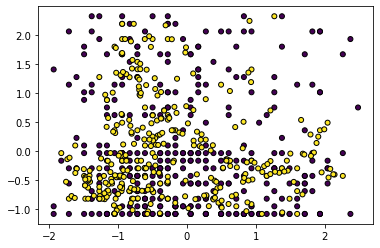

In [1221]:
#Check if dataset is skewed/imbalanced -- If yes then implement oversampling to balance dataset (SMOTE - Synthetic Minority Oversampling technique is one way of achiveing this)
pd.Series(Y_train).value_counts() # Run this test on label, since a single column will give better insights
# plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=Y_train, s=25, edgecolor='k')
# Since dataset is skewed, apply SMOTE
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=2)
X_train, Y_train = smote.fit_sample(X_train,Y_train)
import matplotlib.pyplot as plt
pd.Series(Y_train).value_counts()
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=Y_train, s=25, edgecolor='k')

# from imblearn.over_sampling import ADASYN
# adasyn = ADASYN(random_state=2)
# X_train, Y_train = adasyn.fit_sample(X_train,Y_train)
# import matplotlib.pyplot as plt
# pd.Series(Y_train).value_counts()
# plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=Y_train, s=25, edgecolor='k')


In [1222]:
# Build Classification Tree Model
from sklearn import tree

#Finding the best possible tree size and implementing cross validation using Grid search
from sklearn.model_selection import GridSearchCV
classifier = tree.DecisionTreeClassifier(criterion="entropy")
grid_parameters = {"max_depth":[2,3,4,5,10,15,20,25,30,35]}
gd_sr = GridSearchCV(estimator=classifier,param_grid=grid_parameters,scoring="recall",cv=20)
gd_sr.fit(X_train,Y_train)
best_param = gd_sr.best_params_
print(best_param)
best_result = gd_sr.best_score_
print(best_result)

dtree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
dtree.fit(X_train,Y_train)
# featimp
featimp = pd.Series(dtree.feature_importances_, index=list(X)).sort_values(ascending=False)
# print(featimp)



{'max_depth': 15}
0.8977124183006534


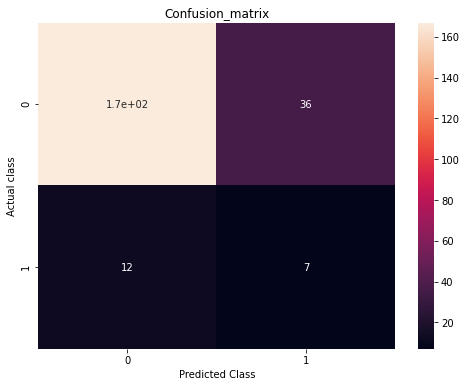

Confusion matrix: 
 [[167  36]
 [ 12   7]]
TP:  7
TN:  167
FP:  36
FN:  12


In [1223]:
#Evaluate Model
from sklearn import metrics
Y_pred = dtree.predict(X_test)
metrics.accuracy_score(Y_test, Y_pred)
conf_matrix = metrics.confusion_matrix(Y_test,Y_pred)
conf_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print("Confusion matrix: \n", conf_matrix)
print("TP: ", conf_matrix[1, 1])
print("TN: ", conf_matrix[0, 0])
print("FP: ", conf_matrix[0, 1])
print("FN: ", conf_matrix[1, 0])